# Linear Regression
Linear regression is used when we want to predict a numerical value. Common exaples include predicting prices (of homes, stocks, etc.). However, not every prediction problem involves classical regression. For instance, in classification problems, the goal is to predict membership in a set of categories.

## Basics
Linear regression flows frim a few simple assumptions:
- 1.- We assume that the relationship between features **$\mathbf{x}$** and target $y$ is approximately linear, i.e., that the conditional mean $E[Y | X = \mathbf{x}]$ can be expressed as a weighted sum of the features $\mathbf{x}$.
- 2.- We can impose the assumption that any such noise is well behaved, following a Gaussion distribution.

### Model
The model is responsable to describe how features can be transformed into an estimate of the target. The assumption of linearity means thath the expected value of the target (price) can be expressed as a weighted sum of the features (area and age):

$$ price = w_{area} \cdot area + w_{age} \cdot age + b.$$

Here $w_{area}$ and $w_{age}$ are called weights, and $b$ is called *bias* (or *offset* or *intercept*). The wieghts determine the influence of each feature on our prediction. The bias determines the value of the estimate when all features are zero, we still need the bias beacuase it allows us to express all linear function of our features (rather than restricting us to lines that pass through the origin). 

Strictly speaking, is an *affine transformation* of input features, which is characterized by a *linear transformation* of features via a weighted sum, combined with a *translation* via the added bias. Given a dataset, our goal is to choose the weights $\mathbf{w}$ and the bias $y$ that, on average, make our model's predictions fit the true prices observed in the data as closely as possible.

To work with high dimensional dataset we adopt the following notation:

$$\hat{y} = w_1 x_1 + \dots + w_d x_d + b$$

where the symbol "hat" denotes an estimate. We can collect the features into a vector $\mathbf{x} \in \mathbb{R}^d$ and all the wieghts into a vector $\mathbf{w} \in \mathbb{R}^d$, therefore:

$$\hat{y} = \mathbf{w}^{T}\mathbf{x} + b$$

the vector $\mathbf{x}$ corresponds to the features of a single example. We will often find it convenient to refer to features of our entire dataset of $n$ examples via the *design matrix* $\mathbf{X} \in \mathbb{R}^{n\times d}$, therefore:

$$\mathbf{\hat{y}} = \mathbf{X}\mathbf{w} + b$$

Before we can got about searching for the best *parameters* (or *model parameters*) $\mathbf{w}$ and $b$, we will need two more things: (i) a measure of the quality of some given model; and a procedure for updating the model to imporve its quality.

### Loss Function

The *loss function* quantify the distance between the *real* and *predictive* values of the target. The loss will usually be a nonnegative number where samaller values are better an perfect predictions incur a loss of $0$. For regression prblems, the most common loss function is the squared error. When our prediction for an example $i$ is $\hat{y}^{(i)}$ and the corresponding true label is $\hat{y}^{(i)}$, the *squared error* is given by:

$$
l^{(i)}(\mathbf{w}, b) = \frac{1}{2}\left(\hat{y}^{(i)} - y^{(i)} \right)^2
$$

Note that large differences between estimates $\hat{y}^{(i)}$ and tagets $y^{(i)}$ lead to even larger contributions to the loss, due to its quadratic form (this quadraticity can be a bouble-edge sword; while it encourages the model to avoid large errors it can also lead to excessive sensitivity to anomalous data). To measure the quality of a model on the enire dataset of $n$ examples, we simpy avarege (or equivalently, sum) the losses on the training set:

$$
L(\mathbf{w}, b) = \frac{1}{n}\sum_{i=1}^{n}l^{(i)}(\mathbf{w}, b) = \frac{1}{n}\sum_{i=1}^{n}\frac{1}{2}\left( \mathbf{w}^{T}\mathbf{x}^{(i)} + b - y^{(i)}\right)^2
$$


When training the model, we seek parameters ($\mathbf{w}^*$, $b^*$) that minimize the total loss across all training examples:

$$
\mathbf{w}^*, b^* = \argmin_{\substack{\mathbf{w}, b}} L(\mathbf{w}, b)
$$

### Analytical Solution

In the case of linear regression, a closed-form solution exists. To find it, we can solve the following minimization problem:

$$ \partial_{\mathbf{w}} ||\mathbf{y} - \mathbf{X}\mathbf{w}||^2 = 0$$

where $\partial_{\mathbf{w}}$ denotes the gradient with respect to $\mathbf{w}$. Expanding the norm, we get:

$$ \partial_{\mathbf{w}} ||\mathbf{y} - \mathbf{X}\mathbf{w}||^2 = 2\mathbf{X}^{T}(\mathbf{X}\mathbf{w} - \mathbf{y}) = 0$$

Solving for $\mathbf{w}$, we get:

$$ \mathbf{w}^* = (\mathbf{X}^{T}\mathbf{X})^{-1}\mathbf{X}^{T}\mathbf{y}$$

where $\mathbf{w}^*$ is unique when $\mathbf{X}^{T}\mathbf{X}$ is full rank. The bias $b$ can be incorporated into $\mathbf{w}$ by adding a column to $\mathbf{X}$ consisting of all ones.

### Minibatch Stochastic Gradient Descent

In cases where we cannot solve the minimization problem analytically, or where the dataset is too large to fit in memory, we can use optimization algorithms to find the optimal parameters. One of the most common algorithms is *stochastic gradient descent* (SGD). 

This technique consists of iteratively reducing the error by updating the parameters in the direction that incrementally lowers the loss function. In each iteration, we first randomly sample a minibatch $\mathcal{B}$ consisting of a fixed number of training examples. Then, we calculate the derivative of the loss with respect to each parameter on the minibatch, and multiply it by a predetermined step size $\eta$ (the *learning rate*) to obtain the update for that iteration. Mathematically, the update step for the parameters $\mathbf{w}$ and $b$ in the $t$-th iteration is given by:

$$ (\mathbf{w}, b) \leftarrow (\mathbf{w}, b) - \frac{\eta}{|\mathcal{B}|}\sum_{i \in \mathcal{B}}\partial_{(\mathbf{w}, b)}l^{(i)}(\mathbf{w}, b)$$

After the stop criterion is met (e.g., the maximum number of iterations is reached), the algorithm terminates, and the parameters are returned and we can use them to make predictions.




## Vectorization for Speed

Let's to learn how to use torch to speed up the computation of the model with a simple example. We will add two vectors of length $1000$ and compare the speed of a naive implementation with a vectorized implementation.

In [3]:
import torch
import time


n = 10000
a = torch.ones(n)
b = torch.ones(n)

In [4]:
c = torch.zeros(n)
t = time.time()
for i in range(n):
    c[i] = a[i] + b[i]
print(f'{time.time() - t} seconds')

0.06548476219177246 seconds


In [5]:
t = time.time()
d = a + b
print(f'{time.time() - t} seconds')

0.00014591217041015625 seconds


## The Normal Distribution and Squared Loss

To give a more formal justification for using the squared loss, let us derive the estimation of the weights in the linear regression model from a probabilistic perspective. Here, we will rely on the assumption that the target variable is given by a linear model corrupted by Gaussian noise, as follows:

$$ y = \mathbf{w}^{T}\mathbf{x} + b + \epsilon$$

where $\epsilon$ is noise that is distributed according to a normal distribution with mean $0$ and variance $\sigma^2$.

The normal distribution is given by:

$$ p(x) = \frac{1}{\sqrt{2\pi}\sigma} \exp\left(-\frac{1}{2\sigma^2}(x - \mu)^2\right)$$

In [9]:
import numpy as np

def normal(x, mu, sigma):
    p = 1 / np.sqrt(2 * np.pi * sigma**2) * np.exp(-0.5 * (x - mu)**2 / sigma**2)
    return p

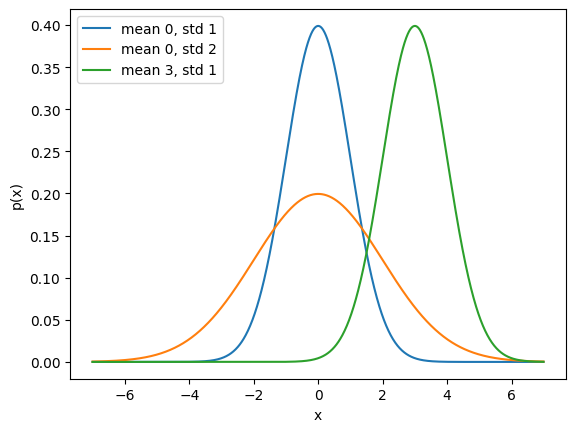

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Use NumPy again for visualization
x = np.arange(-7, 7, 0.01)

# Mean and standard deviation pairs
params = [(0, 1), (0, 2), (3, 1)]

# Plotting using matplotlib
for mu, sigma in params:
    plt.plot(x, normal(x, mu, sigma), label=f'mean {mu}, std {sigma}')

plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend()
plt.show()

Given $y$ in the way described above, we can write the likelihood of observing a particular $y$ for a given $\mathbf{x}$ via:

$$ P(y | \mathbf{x}; \mathbf{w}, b) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{1}{2\sigma^2}(y - \mathbf{w}^{T}\mathbf{x} - b)^2\right)$$

